# Web Scraping using BeautifulSoup

###### For this exercise we will use the following web page: https://en.wikipedia.org/wiki/List_of_state_and_union_territory_capitals_in_India

In [1]:
import requests
page = requests.get("https://en.wikipedia.org/wiki/List_of_state_and_union_territory_capitals_in_India")
page

<Response [200]>

###### page.content will show the html code (it's not post here because it's to big)

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

###### soup.prettify wil show the html code using identation - it will be easier to undersand

### Now we can play with the html code!
###### Here are some methods that you can use with your variable:
- variable.< tag > return content of what you put between opening and closing tag including tag
- variable.< tag >.string return string within given tag
- variable.a return the first a tag

###### If you want to obtain all the content of a particular tag you can use find_all method and then iterate through it to obtain a particular attribute

In [3]:
soup.title

<title>List of state and union territory capitals in India - Wikipedia</title>

In [4]:
soup.title.string

'List of state and union territory capitals in India - Wikipedia'

In [5]:
soup.a

<a id="top"></a>

In [6]:
all_a = soup.find_all('a')

###### all_a will show all the tags a with all their content

### Now let's obtain the data from the table that we want
###### First obtain the data from all tables

In [7]:
all_tables = soup.find_all('table')
all_tables

[<table class="vertical-navbox nowraplinks" style="float:right;clear:right;width:22.0em;margin:0 0 1.0em 1.0em;background:#f9f9f9;border:1px solid #aaa;padding:0.2em;border-spacing:0.4em 0;text-align:center;line-height:1.4em;font-size:88%">
 <tr>
 <th style="padding:0.2em 0.4em 0.2em;font-size:145%;line-height:1.2em"><a href="/wiki/States_and_union_territories_of_India" title="States and union territories of India">States and union<br/>
 territories of India</a><br/>
 ordered by</th>
 </tr>
 <tr>
 <td style="padding:0.2em 0 0.4em">
 <div class="center">
 <div class="floatnone"><a class="image" href="/wiki/File:Flag_of_India.svg"><img alt="Flag of India.svg" data-file-height="900" data-file-width="1350" height="47" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/70px-Flag_of_India.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/105px-Flag_of_India.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/140px-

###### It is a lot of code and as you know there are more than one table in the web page, so we need to identify the right table. For this you can use the class attribute.
###### You can use 'Inspect element' in your browser to identify the class attribute of the right table

In [8]:
right_table=soup.find('table', class_='wikitable sortable plainrowheaders')
right_table

<table class="wikitable sortable plainrowheaders">
<tr>
<th scope="col">No.</th>
<th scope="col">State or<br/>
union territory</th>
<th scope="col">Administrative capitals</th>
<th scope="col">Legislative capitals</th>
<th scope="col"><b>Judiciary capitals</b></th>
<th scope="col">Year capital was established</th>
<th scope="col">The Former capital</th>
</tr>
<tr>
<td>1</td>
<th scope="row"><a href="/wiki/Andaman_and_Nicobar_Islands" title="Andaman and Nicobar Islands">Andaman and Nicobar Islands</a> <img alt="union territory" data-file-height="14" data-file-width="9" height="14" src="//upload.wikimedia.org/wikipedia/commons/3/37/Dagger-14-plain.png" width="9"/></th>
<td><b><a href="/wiki/Port_Blair" title="Port Blair">Port Blair</a></b></td>
<td>Port Blair</td>
<td>Kolkata</td>
<td>1955</td>
<td>Calcutta (1945–1955)</td>
</tr>
<tr>
<td>2</td>
<th scope="row"><a href="/wiki/Andhra_Pradesh" title="Andhra Pradesh">Andhra Pradesh</a></th>
<td><a class="mw-redirect" href="/wiki/Hyderabad,_

###### Once you understand how is distributed the table into html code you have to create lists to save the data that you want

In [9]:
#Generate lists
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    states=row.findAll('th') #To store second column data
    if len(cells)==6: #Only extract table body not heading
        A.append(cells[0].find(text=True))
        B.append(states[0].find(text=True))
        C.append(cells[1].find(text=True))
        D.append(cells[2].find(text=True))
        E.append(cells[3].find(text=True))
        F.append(cells[4].find(text=True))
        G.append(cells[5].find(text=True))

###### And finally we have to those list into a dataframe to obtain this data in a tabular form

In [10]:
#import pandas to convert list to data frame
import pandas as pd
df=pd.DataFrame(A,columns=['Number'])
df['State/UT']=B
df['Admin_Capital']=C
df['Legislative_Capital']=D
df['Judiciary_Capital']=E
df['Year_Capital']=F
df['Former_Capital']=G
df

,Number,State/UT,Admin_Capital,Legislative_Capital,Judiciary_Capital,Year_Capital,Former_Capital
0,1,Andaman and Nicobar Islands,Port Blair,Port Blair,Kolkata,1955,Calcutta (1945–1955)
1,2,Andhra Pradesh,Hyderabad,Amaravati,Hyderabad,1956,Kurnool
2,3,Arunachal Pradesh,Itanagar,Itanagar,Guwahati,1986,None
3,4,Assam,Dispur,Guwahati,Guwahati,1975,Shillong
4,5,Bihar,Patna,Patna,Patna,1912,None
5,6,Chandigarh,Chandigarh,—,Chandigarh,1966,—
6,7,Chhattisgarh,Naya Raipur,Raipur,Bilaspur,2000,—
7,8,Dadra and Nagar Haveli,Silvassa,—,Mumbai,1945,Mumbai (1954–1961)
8,9,Daman and Diu,Daman,—,Mumbai,1987,Ahmedabad
9,10,National Capital Territory of Delhi,New Delhi,New Delhi,New Delhi,1931,—


### Let's try something different

###### Let´s create a table with info from different web pages. First let´s use the following web page: https://en.wikipedia.org/wiki/List_of_largest_oil_and_gas_companies_by_revenue

In [11]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_largest_oil_and_gas_companies_by_revenue")
soup = BeautifulSoup(page.content, 'html.parser')
right_table = soup.find('table', class_='wikitable sortable')
A = []
B = []
C = []
D = []
E = []

In [12]:
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells)==3:
        A.append(str(cells[0].find('a').get('title')))
        B.append(str(cells[1].find('a').get('title')))
        C.append(float(str(cells[2].find(text=True)).replace('**','')))
        D.append(str(cells[1].find('a').get('href')))

###### Now we can construct a dataframe with the previous data

In [13]:
df = pd.DataFrame(A, columns=['Country'])
df['Company Name'] = B
df['Revenue 2017 (US$ Billion)'] = C
df['Link'] = D

In [14]:
df

,Country,Company Name,Revenue 2017 (US$ Billion),Link
0,Saudi Arabia,Saudi Aramco,455.490,/wiki/Saudi_Aramco
1,China,Sinopec,448.000,/wiki/Sinopec
2,China,China National Petroleum Corporation,428.620,/wiki/China_National_Petroleum_Corporation
3,China,PetroChina,367.982,/wiki/PetroChina
4,United States,Exxon Mobil,268.900,/wiki/Exxon_Mobil
5,Netherlands,Royal Dutch Shell,265.000,/wiki/Royal_Dutch_Shell
6,Kuwait,Kuwait Petroleum Corporation,251.940,/wiki/Kuwait_Petroleum_Corporation
7,United Kingdom,BP,222.800,/wiki/BP
8,France,Total SA,212.000,/wiki/Total_SA
9,Russia,Lukoil,144.170,/wiki/Lukoil


###### Now we are going to use each one of the links to acces to the wikipedia article of each company and obtain the first paragraph of that page

In [15]:
for link in df['Link']:
    new_link = 'https://en.wikipedia.org' + link
    page = requests.get(new_link)
    soup = BeautifulSoup(page.content, 'html.parser')
    first_paragraph = soup.p.text
    E.append(first_paragraph)

In [16]:
df['Summary'] = E
df = df.drop('Link',1)
df

,Country,Company Name,Revenue 2017 (US$ Billion),Summary
0,Saudi Arabia,Saudi Aramco,455.490,Saudi Aramco (Arabic: أرامكو السعودية‎ ʾArāmkō...
1,China,Sinopec,448.000,China Petroleum & Chemical Corporation (中国石油化工...
2,China,China National Petroleum Corporation,428.620,China National Petroleum Corporation (CNPC) (s...
3,China,PetroChina,367.982,PetroChina Company Limited (simplified Chinese...
4,United States,Exxon Mobil,268.900,Exxon Mobil Corporation (stylized as ExxonMobi...
5,Netherlands,Royal Dutch Shell,265.000,"Royal Dutch Shell plc (LSE: RDSA, RDSB), commo..."
6,Kuwait,Kuwait Petroleum Corporation,251.940,Kuwait Petroleum Corporation (Arabic: مؤسسة ال...
7,United Kingdom,BP,222.800,"BP plc,[5][6] formerly British Petroleum, is a..."
8,France,Total SA,212.000,Total S.A. (French pronunciation: ​[tɔtal]; En...
9,Russia,Lukoil,144.170,"The PJSC Lukoil Oil Company (Russian: Лукойл, ..."


### And what if we want to do some charts?

###### let's use a different dataset from this web page: https://es.wikipedia.org/wiki/Demograf%C3%ADa_de_Chile

In [17]:
page = requests.get("https://es.wikipedia.org/wiki/Demograf%C3%ADa_de_Chile")
soup = BeautifulSoup(page.content, 'html.parser')
right_table = soup.find('table', class_='toccolours')
H = []
I = []

In [18]:
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    states = row.findAll('th')
    if len(cells)==2:        
        H.append(int(states[0].find(text=True)))
        I.append(str(cells[0].find(text=True)))

In [19]:
I

['750\xa0000',
 '800\xa0000',
 '1\xa0010\xa0336',
 '1\xa0083\xa0801',
 '1\xa0439\xa0120',
 '1\xa0819\xa0223',
 '2\xa0075\xa0971',
 '2\xa0507\xa0005',
 '2\xa0695\xa0625',
 '3\xa0231\xa0022',
 '3\xa0730\xa0235',
 '4\xa0287\xa0445',
 '5\xa0023\xa0539',
 '5\xa0932\xa0995',
 '7\xa0374\xa0115',
 '8\xa0884\xa0768',
 '11\xa0329\xa0736',
 '13\xa0348\xa0401',
 '15\xa0116\xa0435',
 '16\xa0572\xa0475',
 '17\xa0574\xa0003']

In [20]:
for i in range(0,len(I)):
    I[i] = int(I[i].replace('\xa0',''))
I

[750000,
 800000,
 1010336,
 1083801,
 1439120,
 1819223,
 2075971,
 2507005,
 2695625,
 3231022,
 3730235,
 4287445,
 5023539,
 5932995,
 7374115,
 8884768,
 11329736,
 13348401,
 15116435,
 16572475,
 17574003]

In [21]:
df1=pd.DataFrame(H,columns=['Year'])
df1['Population']=I
df1

,Year,Population
0,1800,750000
1,1810,800000
2,1835,1010336
3,1843,1083801
4,1854,1439120
5,1865,1819223
6,1875,2075971
7,1885,2507005
8,1895,2695625
9,1907,3231022


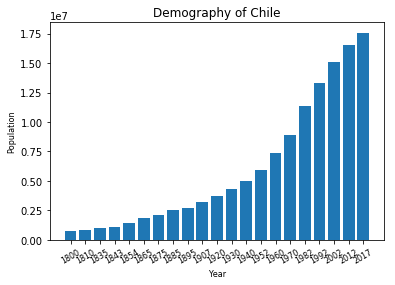

In [23]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(len(df1['Year']))
plt.bar(index, df1['Population'])
plt.xlabel('Year', fontsize=8)
plt.ylabel('Population', fontsize=8)
plt.xticks(index, df1['Year'], fontsize=8, rotation=30)
plt.title('Demography of Chile')
plt.show()

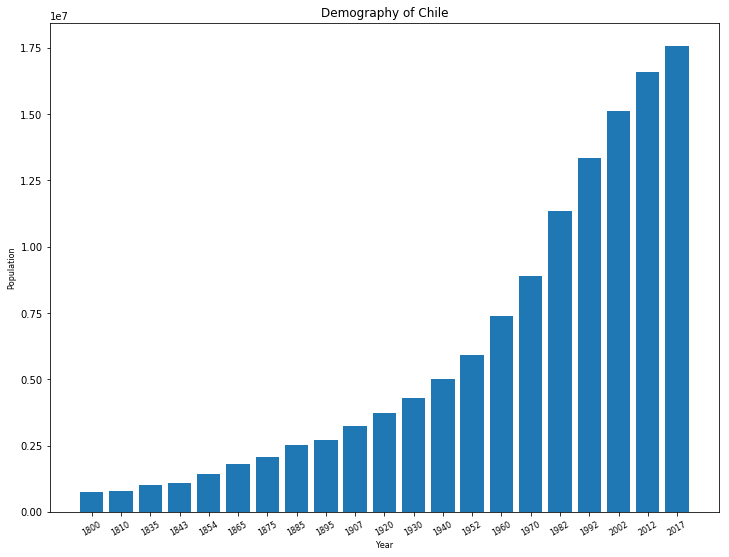

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(df1['Year']))
plt.bar(index, df1['Population'])
plt.xlabel('Year', fontsize=8)
plt.ylabel('Population', fontsize=8)
plt.xticks(index, df1['Year'], fontsize=8, rotation=30)
plt.title('Demography of Chile')
plt.show()

# Thanks !